In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
from sklearn.preprocessing import LabelEncoder

# TASK1 - Data Prepration and Splitting

### Load The Data

In [4]:
df=pd.read_csv('DS2_C5_S6_KCHouse_Data_Practice.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.drop(['id','date','zipcode'], inplace = True, axis =1)

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


### Spliting Input and Target Variables

### Scaling Input Varibales 

In [25]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
df_scaled= pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

### Finding correlation between features 

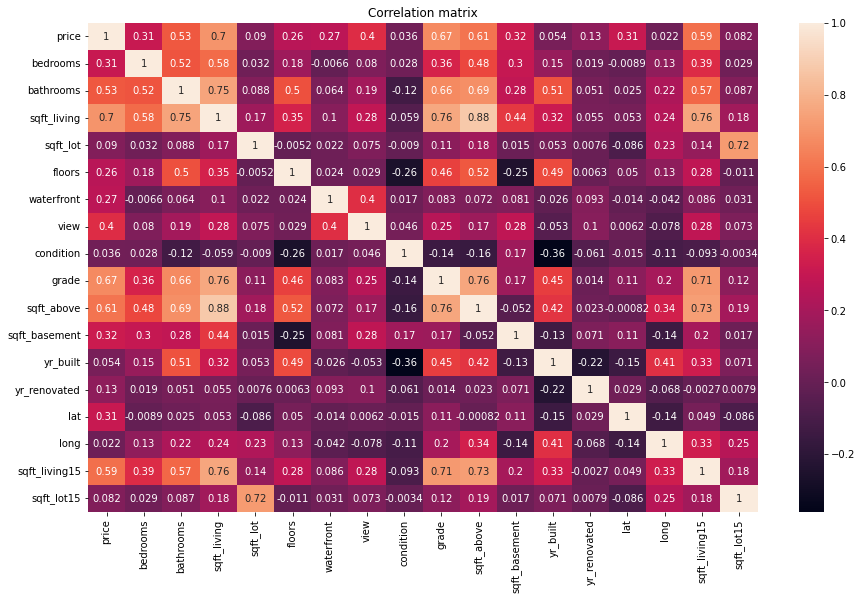

In [107]:
plt.figure(figsize=(15,9))
hm = sns.heatmap(df_scaled.corr(), annot = True)

hm.set(title = 'Correlation matrix')
plt.show()

### Test Train Split

In [27]:
X = df_scaled.iloc[:,1:]
y=df_scaled.price

from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(X,y,train_size=0.3)

In [28]:
y_test

2190     0.076030
16009    0.639880
18414    0.665757
5182     0.225845
11540    1.116565
           ...   
15331   -0.531403
12158   -0.239945
8963    -0.468753
9107     1.048467
11463   -0.929095
Name: price, Length: 15130, dtype: float64

# TASK2 - Baseline: Linear Regression

In [97]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = model.predict(X_test)

In [99]:
s_r_sq=model.score(X_train, y_train)
print('coefficient of determination:', s_r_sq ,'\n')

coefficient of determination: 0.6949597914667073 



In [100]:
s_r_sq=model.score(X_test, y_test)
print('coefficient of determination:', s_r_sq ,'\n')

coefficient of determination: 0.6938566517601725 



In [101]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(MSE)

0.3035146391422909


In [102]:
np.sqrt(MSE)

0.5509216270417153

In [106]:
from numpy import mean
from numpy import std
# define the model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# evaluate the model
cv = KFold(n_splits=10)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

F1-Score: -0.308 (0.040)


# TASK3: Bagging with Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
er= RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [61]:
er.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [62]:
er.score(X_test,y_test)

0.7687092161302803

In [63]:
er.score(X_train,y_train)

0.8294019225378589

In [64]:
er.oob_score_

0.7728783588121563

In [65]:
y_pred1= er.predict(X_test)

# Task4 : Best Model 

### Score for Random Forest Regressor 

In [82]:
er.score(X_test,y_test)

0.7687092161302803

### Score for Linear Regression

In [84]:
s_r_sq

0.6938566517601725

## Conclusion

### As we are getting better accuracy in Random Forest Regressor so we can consider 'er' Model

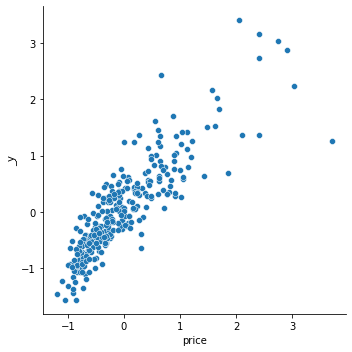

In [89]:
sns.relplot(x=y_test[0:300], y=y_pred[0:300], kind='scatter');

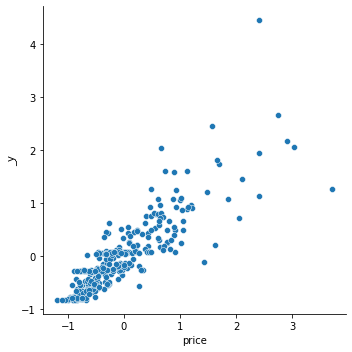

In [90]:
sns.relplot(x=y_test[0:300], y=y_pred1[0:300], kind='scatter');